### Import libraries and the diabetes dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("/Users/jieilnjiang/Desktop/2178 midterm /diabetes (2).csv")
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
#Take a look of the distrbutions of every attributes
df.describe().transpose()

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [5]:
df.shape

(768, 9)

### Exploratory Data Analysis

In this section, we will be doing some basic Exploratory Data Analysis to get the "feel" of the data, we will be checking the distributions, the correlations etc of the different columns and try to remove the null values present

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.Outcome=df.Outcome.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


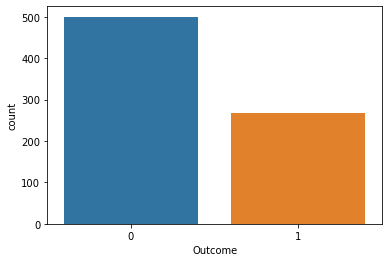

In [8]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(df['Outcome'])
plt.show()


#### Check for missing values and replacing them with mean/median depending on the skewness of each variable

In [9]:
#checking for the missing values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It seems like there are no "Null" value, but there are some values equals to zero which doesn't make sense. Thus, we replace those zero values with the median of that column except for the first column (Pregnancies) and the last column (Outcome)

Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution. The peak of the histogram represents the mode.

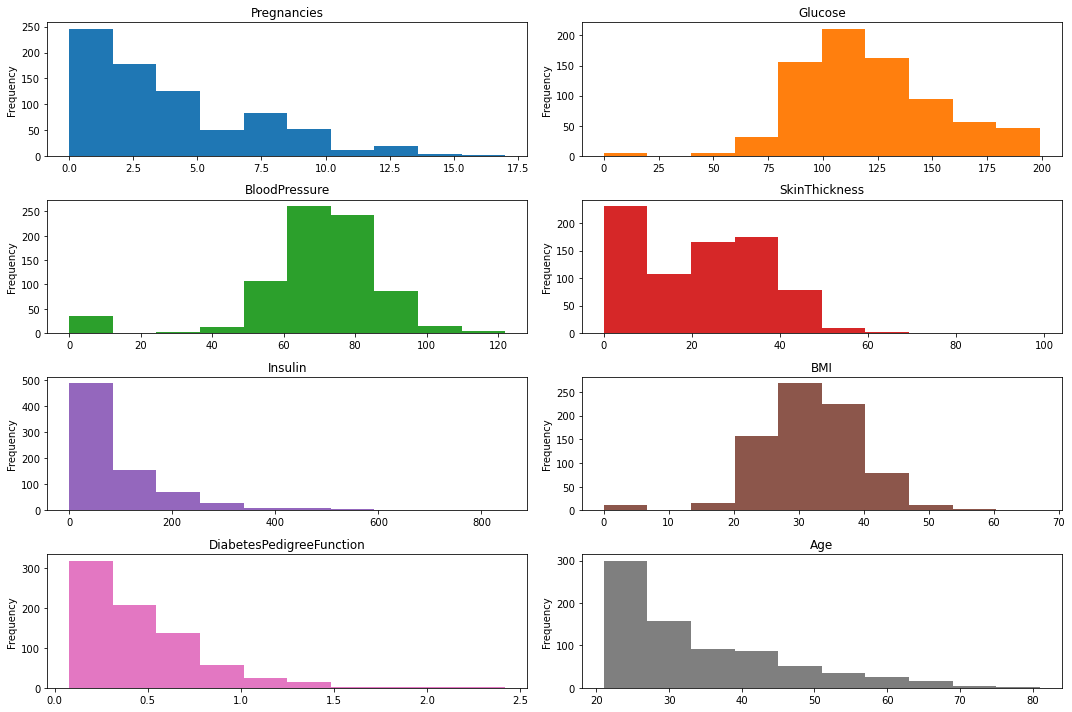

In [10]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = df.drop('Outcome', axis = 1).columns
for col in columns:
    df[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.tight_layout()
plt.show()

In [11]:
from scipy.stats import skew
for col in df.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, df[col].skew()))

Skewness for the column Pregnancies is 0.9016739791518588
Skewness for the column Glucose is 0.17375350179188992
Skewness for the column BloodPressure is -1.8436079833551302
Skewness for the column SkinThickness is 0.10937249648187608
Skewness for the column Insulin is 2.272250858431574
Skewness for the column BMI is -0.42898158845356543
Skewness for the column DiabetesPedigreeFunction is 1.919911066307204
Skewness for the column Age is 1.1295967011444805


In [12]:
df.loc[df['Glucose']==0|np.isnan(df['Glucose']),'Glucose']=df['Glucose'].mean()
df.loc[df['BloodPressure']==0|np.isnan(df['BloodPressure']),'BloodPressure']=df['BloodPressure'].mean()
df.loc[df['SkinThickness']==0|np.isnan(df['SkinThickness']),'SkinThickness']=df['SkinThickness'].mean()
df.loc[df['Insulin']==0|np.isnan(df['Insulin']),'Insulin']=df['Insulin'].median()
df.loc[df['BMI']==0|np.isnan(df['BMI']),'BMI']=df['BMI'].mean()
df.loc[df['DiabetesPedigreeFunction']==0|np.isnan(df['DiabetesPedigreeFunction']),'DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].median()
df.loc[df['Age']==0|np.isnan(df['Age']),'Age']=df['Age'].median()

Columns like Glucose, BloodPressure, SkinThickness and BMI are not that much skewed. We can fill null values with the mean for these columns, but for columns like Insulin and DiabetesPedigreeFunction, we will have to replace them will median due to the effect of skewness. I would rather keep the zero values in Pregenancies as what it is because the zero value make sense here.

In [13]:
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0      35.000000     30.5  33.6   
1            1     85.0           66.0      29.000000     30.5  26.6   
2            8    183.0           64.0      20.536458     30.5  23.3   
3            1     89.0           66.0      23.000000     94.0  28.1   
4            0    137.0           40.0      35.000000    168.0  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.672   32       1  
3                     0.167   21       0  
4                     2.288   33       1

##### Boxplot

([<matplotlib.axis.XTick at 0x7fc70f9d3d60>,
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

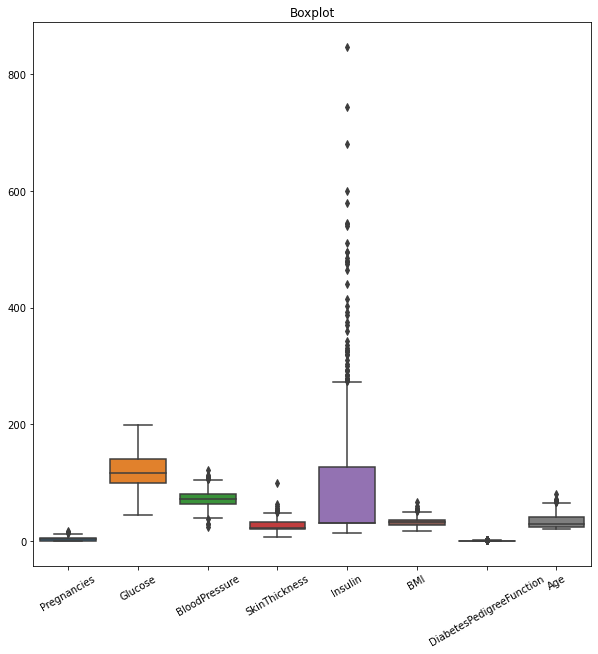

In [14]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(data=df, ax=ax)
plt.title("Boxplot")
feature_cols = df.columns[:-1]
x_values = list(range(len(feature_cols)))
plt.xticks(x_values, feature_cols, rotation=30)

array([[<AxesSubplot:title={'center':'Age'}, xlabel='[Outcome]'>,
        <AxesSubplot:title={'center':'BMI'}, xlabel='[Outcome]'>,
        <AxesSubplot:title={'center':'BloodPressure'}, xlabel='[Outcome]'>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}, xlabel='[Outcome]'>],
       [<AxesSubplot:title={'center':'Glucose'}, xlabel='[Outcome]'>,
        <AxesSubplot:title={'center':'Insulin'}, xlabel='[Outcome]'>,
        <AxesSubplot:title={'center':'Pregnancies'}, xlabel='[Outcome]'>,
        <AxesSubplot:title={'center':'SkinThickness'}, xlabel='[Outcome]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

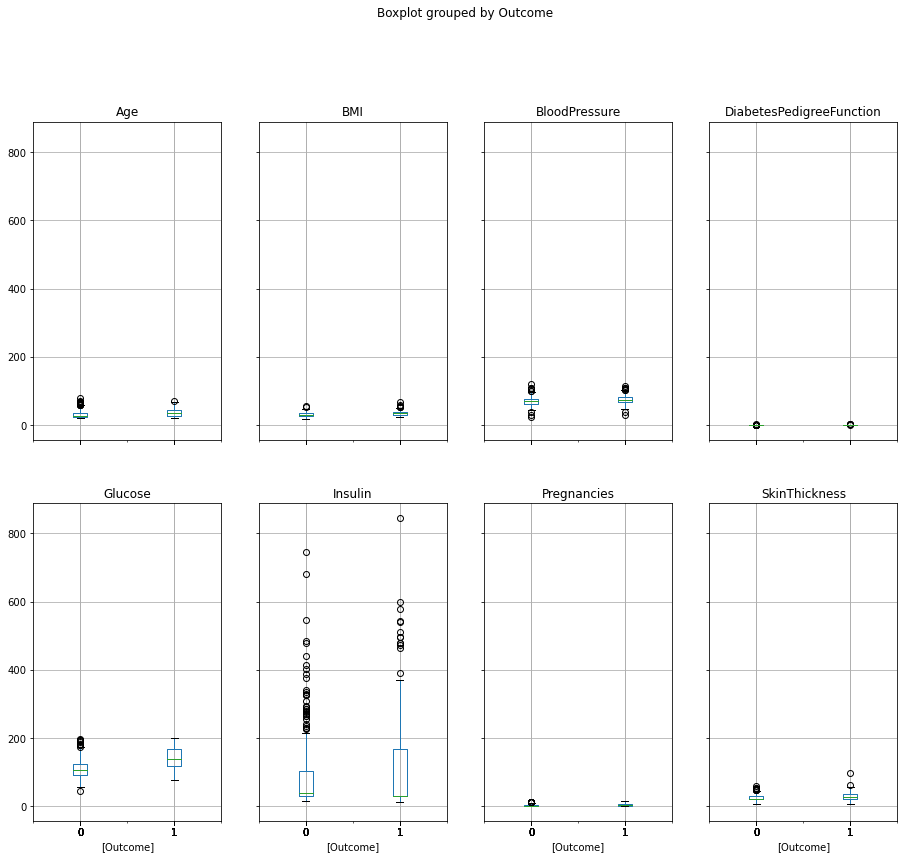

In [15]:
import matplotlib.pylab as plt

df.boxplot(by = 'Outcome',  layout=(3,4), figsize=(15, 20))

limitation: the most people in this dataset are people don't have diabete (500 vs 300), therefore it's reasonable to have these really high values(2 hour after glucose administration	16-166 mIU/L	111-1153 pmol/L). kaggle: "Insulin: 2-Hour serum insulin (mu U/ml)"

In [16]:
# 是否要变成upperbound？？？
#for col in df.columns[:-1]:
#    Q1 = df[col].quantile(0.25)
#    Q3 = df[col].quantile(0.75)
#    IQR = Q3 - Q1
#    lower = Q1 - 1.5 * IQR
#    upper = Q3 + 1.5 * IQR
#    if df[(df[col] < lower) | (df[col] > upper)].any(axis=None):
#        df = df[(df[col] >= lower) & (df[col] <= upper)]
#        print("removing outliers in {}".format(col))
#         cleaned_df.loc[df[ col] < lower, col] = lower
#         cleaned_df.loc[df[col] > upper, col] = upper
#         print("replacing outliers in {} with its lower bound {} or upper bound {}".format(col, lower, upper))
        

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>],
       [<AxesSubplot:title={'center':'BloodPressure'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>],
       [<AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

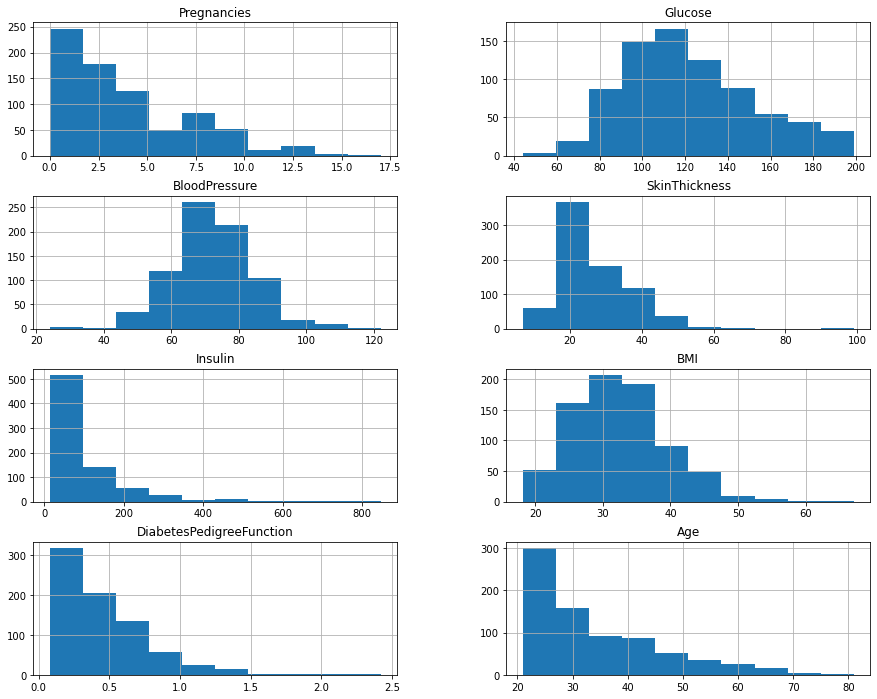

In [17]:
df.hist(layout=(4,2),figsize=(15,12),grid=True)


/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


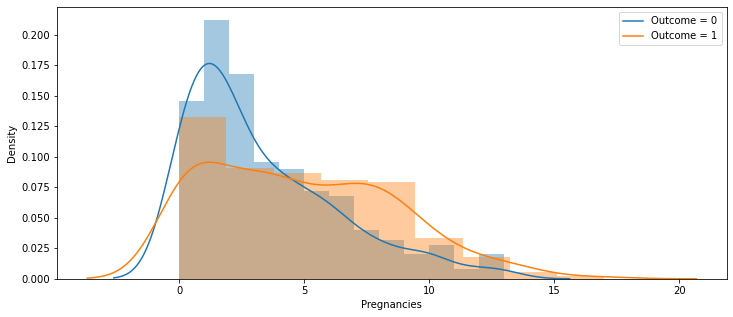

/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


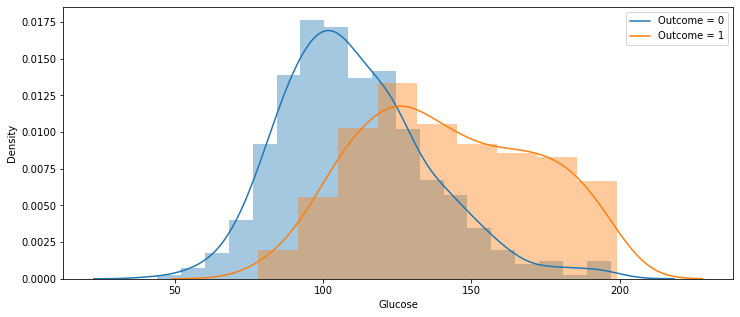

/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


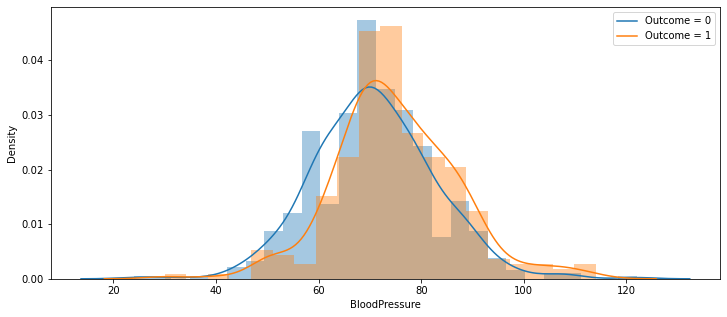

/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


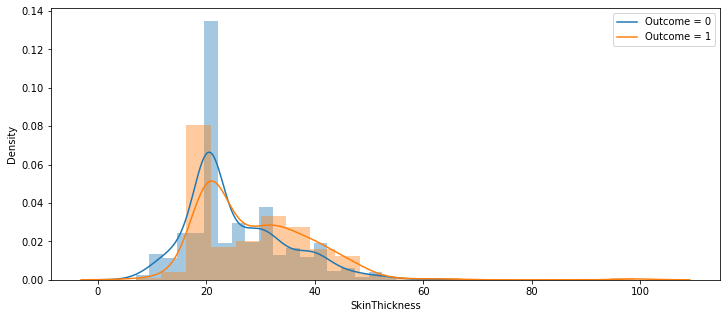

/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


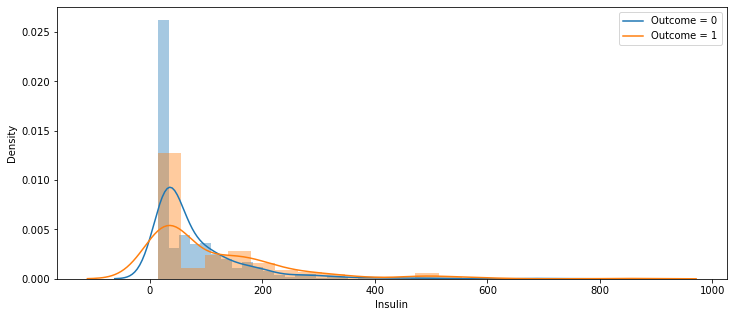

/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


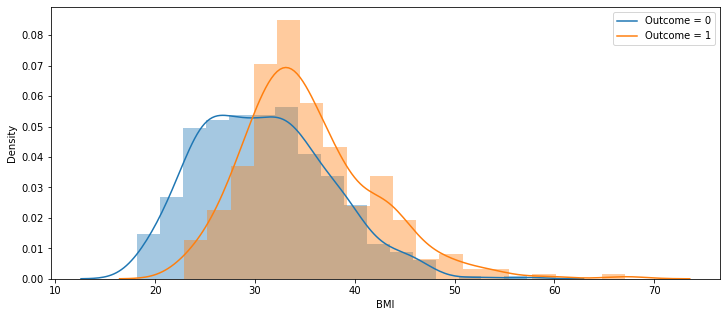

/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


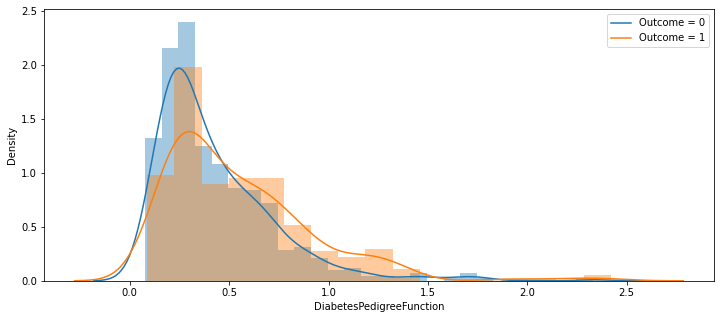

/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


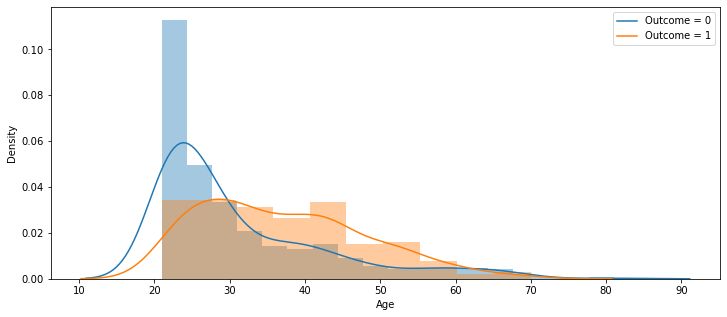

/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jieiln

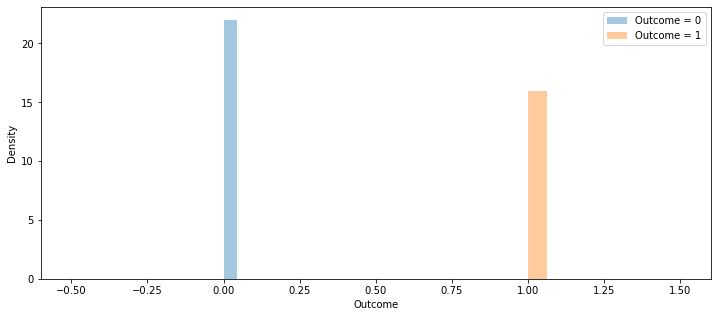

In [18]:
for col in df.columns:
    plt.figure(figsize=(12,5))
    sns.distplot(df.loc[df['Outcome'] == 0, col])
    sns.distplot(df.loc[df['Outcome'] == 1, col])
    plt.legend(['Outcome = 0', 'Outcome = 1'])
    plt.show()

####  Outliner 
boxplot
outliner treatment: drop? or max?
boxplot 

histogram
each & according to 1 or 0
correlation 

check assumption: 
normality: 3 tests, qq plot
equal variance: leven test: centre mean/median


t-test: two samples:welch t test
ANOVA 
MLR

### Check for assumption Normality

#### Q-Q PLOT

In [19]:
import pylab 
import scipy.stats as stats

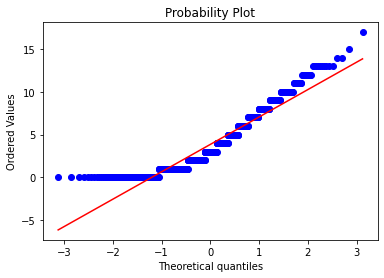

In [20]:
stats.probplot(df['Pregnancies'], dist="norm", plot=pylab)
pylab.show()

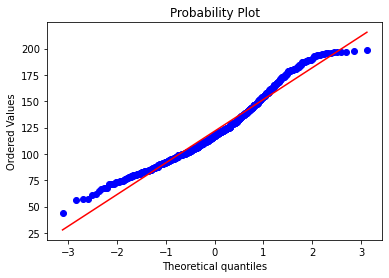

In [21]:
stats.probplot(df['Glucose'], dist="norm", plot=pylab)
pylab.show()

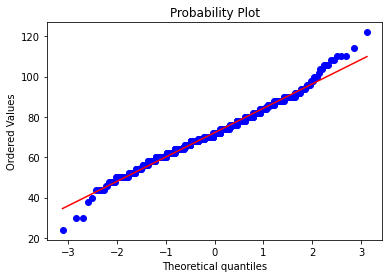

In [22]:
stats.probplot(df['BloodPressure'], dist="norm", plot=pylab)
pylab.show()

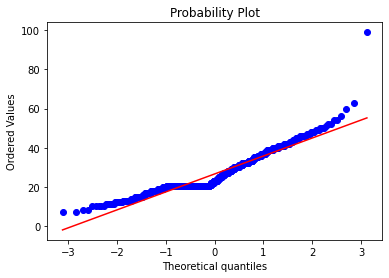

In [23]:
stats.probplot(df['SkinThickness'], dist="norm", plot=pylab)
pylab.show()

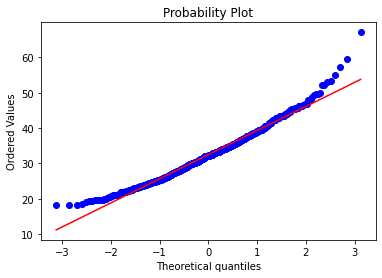

In [24]:
stats.probplot(df['BMI'], dist="norm", plot=pylab)
pylab.show()

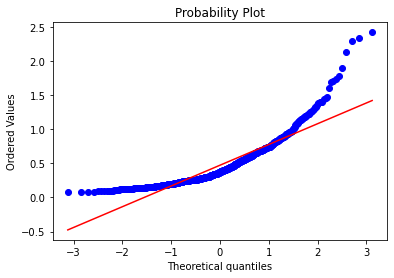

In [25]:
stats.probplot(df['DiabetesPedigreeFunction'], dist="norm", plot=pylab)
pylab.show()

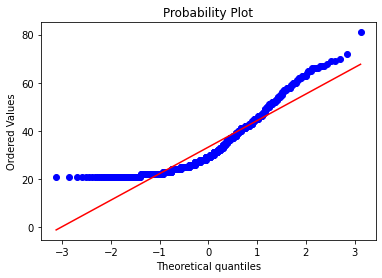

In [26]:
stats.probplot(df['Age'], dist="norm", plot=pylab)
pylab.show()

#### Correlation 

In [27]:
#check correlation
df['Outcome'] = df['Outcome'].astype('int64')
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.055697  0.357081      -0.022049       0.274253   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357081  0.231478                  0.137106   
BloodPressure            -0.022049  0.281231                  0.000371   
SkinThickness             0.274253  0.535703                  0.154961   
Insulin                   1.000000  0.189031                  0.178029   
BMI                       0.189031  1.000000                  0.153508   
DiabetesPedigreeFunction  0.178029  0.153508                  1.000000   
Age                      -0.015413  0.025748                  0.033561   
Outcome                   0.148457  0.312254                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266600  0.492908  
BloodPressure             0.326740  0.162986  
SkinThickness             0.026423  0.175026  
Insulin                  -0.015413  0.148457  
BMI                       0.025748  0.312254  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

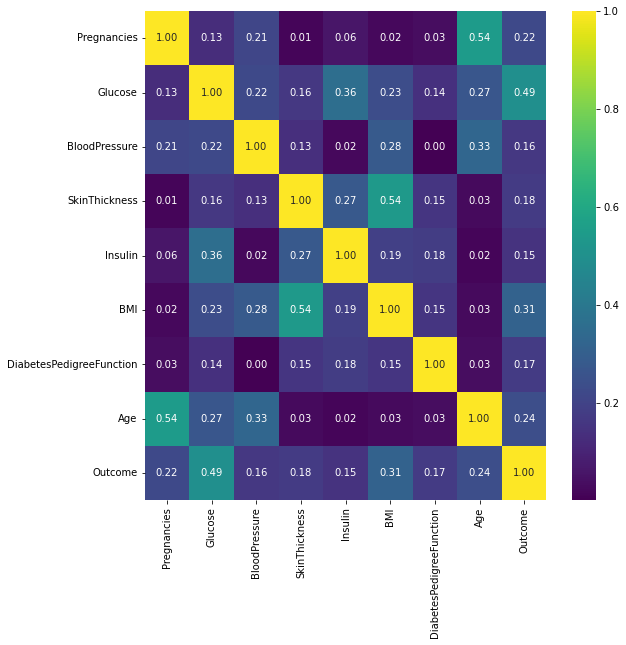

In [28]:
#Visualize the correlations
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(df.corr()),annot=True,cmap="viridis",fmt="0.2f");

In [29]:
# research Pregnancies, Glucose, BMI, and Age towards Diabetes
df.loc[df['Outcome']==0,['Pregnancies', 'Glucose', 'BMI','Age']]

Pregnancies  Glucose   BMI  Age
1              1     85.0  26.6   31
3              1     89.0  28.1   21
5              5    116.0  25.6   30
7             10    115.0  35.3   29
10             4    110.0  37.6   30
..           ...      ...   ...  ...
762            9     89.0  22.5   33
763           10    101.0  32.9   63
764            2    122.0  36.8   27
765            5    121.0  26.2   30
767            1     93.0  30.4   23

[500 rows x 4 columns]

In [30]:
#levene's test for constancy of variance
target_df = df.loc[:,['Pregnancies', 'Glucose', 'BMI','Age', 'Outcome']]

for col in target_df.columns[:-1]:
    statistic, pvalue = stats.levene(target_df.loc[target_df['Outcome']==0, col], target_df.loc[target_df['Outcome']==1, col])
    print("statistic:", statistic, "p-value:", pvalue)
    
    

statistic: 22.74716691051014 p-value: 2.212165915740029e-06
statistic: 23.61915456579704 p-value: 1.424585292938956e-06
statistic: 1.3062068484783063 p-value: 0.25343965556390974
statistic: 2.225209723504269 p-value: 0.13618591982127692


In [31]:
### check for normality

In [32]:
alpha = 0.05
d = {'stats.normaltest':[],'stats.jarque-bera': [], 'stats.kstest': []}
labels = []

for col in target_df.columns[:-1]:
    s1, pvalue1 = stats.normaltest(df[[col]])
    s2, pvalue2 = stats.jarque_bera(df[[col]])
    s3, pvalue3 = stats.kstest(df[[col]], 'norm')
#     a = stats.anderson(cleaned_df[[col]], dist="norm")
    d['stats.normaltest'].append(pvalue1[0])
    d['stats.jarque-bera'].append(pvalue2)
    d['stats.kstest'].append(pvalue3)
    labels.append(col)
    
    print("Column:", col)
    
    print("stats.normaltest test statistic", s1, "p-value", pvalue1)
    if pvalue1 < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
        
    print("Jarque-Bera test statistic", s2, "p-value", pvalue2)
    if pvalue2 < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
        
    print("Kolmogorov-Smirnov test statistic", s3, "p-value", pvalue3)
    if pvalue3 < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
        


normaldf1 = pd.DataFrame(d, index=labels)
display(normaldf1)
print()

Column: Pregnancies
stats.normaltest test statistic [80.16379459] p-value [3.91429164e-18]
The null hypothesis can be rejected
Jarque-Bera test statistic 104.38339113110155 p-value 0.0
The null hypothesis can be rejected
Kolmogorov-Smirnov test statistic 1.0 p-value 0.0
The null hypothesis can be rejected
Column: Glucose
stats.normaltest test statistic [35.37277779] p-value [2.08400567e-08]
The null hypothesis can be rejected
Jarque-Bera test statistic 38.498145190281726 p-value 4.367510797465002e-09
The null hypothesis can be rejected
Kolmogorov-Smirnov test statistic 1.0 p-value 0.0
The null hypothesis can be rejected
Column: BMI
stats.normaltest test statistic [54.94802594] p-value [1.17000514e-12]
The null hypothesis can be rejected
Jarque-Bera test statistic 72.42444191445742 p-value 2.220446049250313e-16
The null hypothesis can be rejected
Kolmogorov-Smirnov test statistic 1.0 p-value 0.0
The null hypothesis can be rejected
Column: Age
stats.normaltest test statistic [119.8776359

stats.normaltest  stats.jarque-bera  stats.kstest
Pregnancies      3.914292e-18       0.000000e+00           0.0
Glucose          2.084006e-08       4.367511e-09           0.0
BMI              1.170005e-12       2.220446e-16           0.0
Age              9.308980e-27       0.000000e+00           0.0

#### T-tests

In [33]:
outcome0 = df.loc[df.Outcome == 0]
outcome1 = df.loc[df.Outcome == 1]

In [34]:
alpha = 0.05

for col in target_df.columns[:-1]:
    print(col)
    print("H0: the average of {} in the group of outcome = 0 == that of the group of outcome = 1".format(col))
    print("Ha: the average of {} in the group of outcome = 0 != that of the group of outcome = 1".format(col))
    statistic, pvalue = stats.ttest_ind(a=outcome0[col], b=outcome1[col], equal_var=False)
    print("p-value:", pvalue)
    if pvalue < alpha:
        print("The null hypothesis can be rejected\n")
    else:
        print("Fail to reject the null hypothesis\n")
    


Pregnancies
H0: the average of Pregnancies in the group of outcome = 0 == that of the group of outcome = 1
Ha: the average of Pregnancies in the group of outcome = 0 != that of the group of outcome = 1
p-value: 6.821925600457145e-09
The null hypothesis can be rejected

Glucose
H0: the average of Glucose in the group of outcome = 0 == that of the group of outcome = 1
Ha: the average of Glucose in the group of outcome = 0 != that of the group of outcome = 1
p-value: 3.163532729814047e-41
The null hypothesis can be rejected

BMI
H0: the average of BMI in the group of outcome = 0 == that of the group of outcome = 1
Ha: the average of BMI in the group of outcome = 0 != that of the group of outcome = 1
p-value: 2.435552459741235e-18
The null hypothesis can be rejected

Age
H0: the average of Age in the group of outcome = 0 == that of the group of outcome = 1
Ha: the average of Age in the group of outcome = 0 != that of the group of outcome = 1
p-value: 1.2015125273113395e-11
The null hypothe

### Modelling

#### ANOVA
#Binning numerical data to categorical data

In [35]:
### one way anova: categorical(x)-> numerical (y) 

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Glucose, Age, BMI ,Pregnancies

In [38]:
df.loc[df['BMI']<27.5,'Bined_BMI']='Normal weight' #bining the numerical data manually
df.loc[((df['BMI']>=27.5)&(df['BMI']<32)),'Bined_BMI']='OverweightaLittle'
df.loc[((df['BMI']>=32)&(df['BMI']<36.6)),'Bined_BMI']='Overweight'
df.loc[df['BMI']>67.1,'Bined_BMI']='Obese'
model=ols("Glucose ~ Bined_BMI",data=df.loc[:,['Bined_BMI','Glucose']]).fit() #actual fitting it into model
sm.stats.anova_lm(model,type=2)

df         sum_sq      mean_sq         F   PR(>F)
Bined_BMI    2.0   15039.065846  7519.532923  8.700032  0.00019
Residual   554.0  478828.273254   864.310963       NaN      NaN

In [39]:
model.t_test_pairwise('Bined_BMI').result_frame

coef   std err         t     P>|t|  \
Overweight-Normal weight         12.630697  3.028279  4.170916  0.000035   
OverweightaLittle-Normal weight   6.490164  3.065799  2.116957  0.034709   
OverweightaLittle-Overweight     -6.140533  3.061830 -2.005511  0.045394   

                                 Conf. Int. Low  Conf. Int. Upp.  pvalue-hs  \
Overweight-Normal weight               6.682385        18.579010   0.000106   
OverweightaLittle-Normal weight        0.468151        12.512177   0.068213   
OverweightaLittle-Overweight         -12.154748        -0.126318   0.068213   

                                 reject-hs  
Overweight-Normal weight              True  
OverweightaLittle-Normal weight      False  
OverweightaLittle-Overweight         False

In [54]:
bined_df = df.copy()
bined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Bined_BMI                 557 non-null    object 
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


In [55]:
bined_df['Age'] = pd.cut(bined_df['Age'], bins=[15,25,65,100], labels=['Youth', 'Adult', 'Senior'])
model=ols("Glucose ~ Age",data=bined_df).fit() #actual fitting it into model
# sm.stats.anova_lm(model,type=2)

In [67]:
bined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    category
 8   Outcome                   768 non-null    int64   
 9   Bined_BMI                 557 non-null    object  
dtypes: category(1), float64(6), int64(2), object(1)
memory usage: 55.0+ KB


In [51]:
model.t_test_pairwise('Age').result_frame

coef   std err         t         P>|t|  Conf. Int. Low  \
Adult-Youth   14.448740  2.255025  6.407354  2.586259e-10       10.021970   
Senior-Youth  24.999456  8.413856  2.971225  3.059072e-03        8.482470   
Senior-Adult  10.550716  8.324931  1.267364  2.054109e-01       -5.791704   

              Conf. Int. Upp.     pvalue-hs  reject-hs  
Adult-Youth         18.875511  7.758776e-10       True  
Senior-Youth        41.516443  6.108786e-03       True  
Senior-Adult        26.893136  2.054109e-01      False

In [ ]:
df.loc[df['Pregnancies']<1,'Bined_Pregnancies']='No kids' #bining the numerical data manually
df.loc[((df['Pregnancies']>1)&(df['Pregnancies']<3)),'Bined_Pregnancies']='Few Kids'
df.loc[((df['Pregnancies']>3)&(df['Pregnancies']<6)),'Bined_Pregnancies']='Too many'
df.loc[df['Pregnancies']>6,'Bined_Pregnancies']='Heroine'
model=ols("Glucose ~ Bined_Pregnancies",data=df.loc[:,['Bined_Pregnancies','Glucose']]).fit() #actual fitting it into model
sm.stats.anova_lm(model,type=2)

In [ ]:
model.t_test_pairwise('Bined_Pregnancies').result_frame

#### Multi Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# making predictions
y_pred = regressor.predict(X_test)
# round_y_pred = np.array([round(x) for x in y_pred])
y_encode = y_pred.copy()
for i in range(0,len(y_pred)):
    if y_pred[i] < 0.5:
        y_encode[i] = 0
    else:
        y_encode[i] = 1


In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_encode})
df

In [ ]:
accuracy=metrics.accuracy_score(y_encode,y_test)
print("accuracy=",accuracy*100,"%")

#### ANCOVA

In [68]:
diabetes_df = bined_df[["Glucose", "BMI", "Age"]]

In [71]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Glucose  768 non-null    float64 
 1   BMI      768 non-null    float64 
 2   Age      768 non-null    category
dtypes: category(1), float64(2)
memory usage: 13.0 KB


In [74]:
diabetes_df

Glucose   BMI    Age
0      148.0  33.6  Adult
1       85.0  26.6  Adult
2      183.0  23.3  Adult
3       89.0  28.1  Youth
4      137.0  43.1  Adult
..       ...   ...    ...
763    101.0  32.9  Adult
764    122.0  36.8  Adult
765    121.0  26.2  Adult
766    126.0  30.1  Adult
767     93.0  30.4  Youth

[768 rows x 3 columns]

In [122]:
from bioinfokit.analys import stat 

In [129]:
#check for Homogeneity 
res = stat()
res.levene(df=diabetes_df,res_var='BMI',xfac_var='Age')
res.levene_summary

Parameter   Value
0      Test statistics (W)  0.4429
1  Degrees of freedom (Df)  2.0000
2                  p value  0.6423

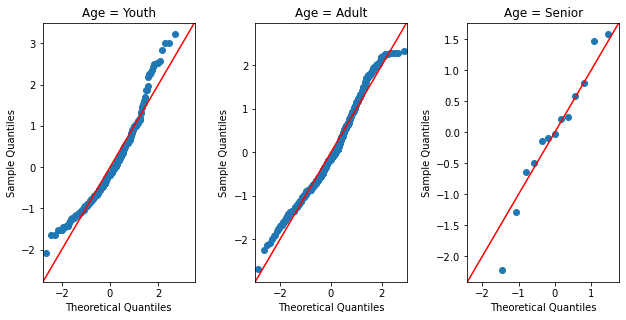

In [80]:
# check assumption--normality
fig, axes = plt.subplots(nrows=1, ncols= 3, figsize=(10,4))
ax = axes.flatten()
count = 0
for i in  ['Youth', 'Adult', 'Senior']:
    sm.qqplot(diabetes_df.loc[diabetes_df.Age == i, 'Glucose'], line='45', fit=True, dist=stats.norm, ax=ax[count])
    ax[count].set_title('Age = {}'.format(i))
    count += 1

plt.subplots_adjust(left=0.1, bottom=0, right=0.9, top=0.9, wspace=0.4, hspace=0.4)    
plt.show()



In [81]:
for i in  ['Youth', 'Adult', 'Senior']:
    statistic, pvalue = stats.normaltest(diabetes_df.groupby('Age').get_group(i).Glucose)
    print("Age = {}".format(i))
    print("Test Statistic:", statistic, "P-value:", pvalue)
print()

Age = Youth
Test Statistic: 31.966817291898774 P-value: 1.1441786061276385e-07
Age = Adult
Test Statistic: 17.12566207178777 P-value: 0.00019107757970980018
Age = Senior
Test Statistic: 1.1976805207077728 P-value: 0.5494484839241118



/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


reject the null hypothesis, not normally distributed

In [ ]:
#### CHECK FOR LINEARITY OF THE COVARIate and dependent variable at each level of independent variable.

/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


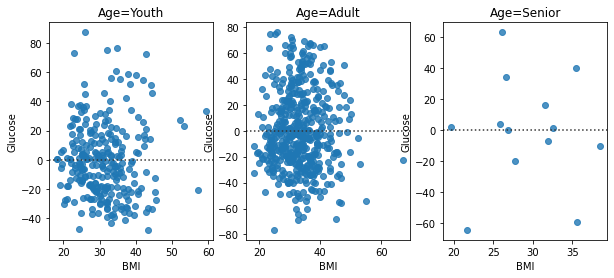

In [100]:
from sklearn.linear_model import LinearRegression
fig, axes = plt.subplots(nrows=1, ncols= 3, figsize=(10,4))
ax = axes.flatten()
count = 0
for i in  ['Youth', 'Adult', 'Senior']:
    level_df = diabetes_df.groupby('Age').get_group(i)
    sns.residplot(level_df.BMI, level_df.Glucose, ax=ax[count])
    ax[count].set_title('Age={}'.format(i))
    count += 1

In [ ]:
#### The graph shows the that the data are not showing linearity 

In [86]:
import pingouin as pg
from pingouin import ancova
ancova(data=diabetes_df,dv='Glucose',covar='BMI',between='Age')

Source             SS   DF          F         p-unc       np2
0       Age   31392.413619    2  18.706705  1.170685e-08  0.046684
1       BMI   30300.321882    1  36.111857  2.882912e-09  0.045134
2  Residual  641048.344360  764        NaN           NaN       NaN

#### Power Analysis

In [ ]:
#statistical power 
import numpy as np
import pandas as pd

from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

In [ ]:
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

In [ ]:
diabetes_df.describe()

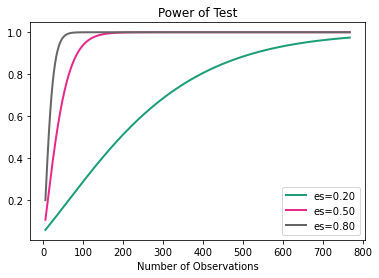

In [88]:
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 768))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()


In [95]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479   94.652344   
std       3.369578   30.436016      12.115932       9.631241  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [112]:
# perform power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect_size = effect, power=power, nobs1=None, alpha=alpha, ratio=1.0, alternative = 'two-sided')
print('Sample Size: %.3f' % result)

Sample Size: 25.525


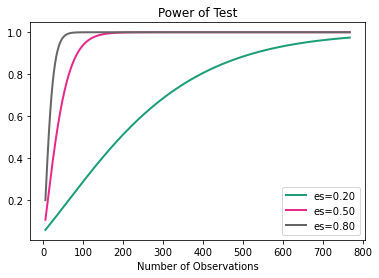

In [99]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 768))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

In [115]:
#statistical power example
import numpy as np
import pandas as pd

from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()


In [116]:
# parameters for the analysis 
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))
#25.52 is the minial sample size to achieve the effect given the effect size =0.8,alpha= 0.05 and power= 0.8

Required sample size: 25.52


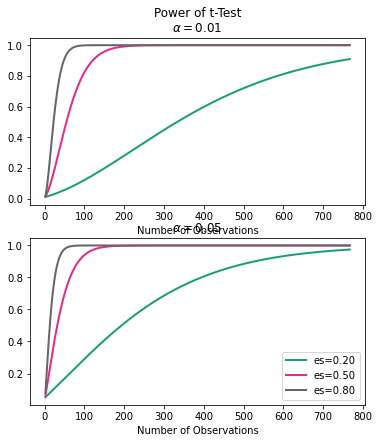

In [119]:
# power vs. number of observations 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 768),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 768),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)

In [131]:
#post-hoc analysis
from statsmodels.stats.multicomp import pairwise_tukeyhsd
mc = pairwise_tukeyhsd(diabetes_df['Glucose'], diabetes_df['Age'], alpha=0.05)
print(mc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 Adult Senior  10.5507 0.4141  -8.9985    30.1  False
 Adult  Youth -14.4487    0.0 -19.7442 -9.1533   True
Senior  Youth -24.9995 0.0086 -44.7575 -5.2414   True
-----------------------------------------------------


In [132]:
# @np.vectorize
# def power_grid(x,y):
#     power = TTestIndPower().solve_power(effect_size = x, 
#                                         nobs1 = y, 
#                                         alpha = 0.05)
#     return power

# X,Y = np.meshgrid(np.linspace(0.01, 1, 51), 
#                   np.linspace(10, 1000, 100))
# X = X.T
# Y = Y.T

# Z = power_grid(X, Y) # power

# data = [Surface(x = X, y= Y, z = Z)]

# layout = Layout(
#     title='Power Analysis',
#     scene = dict(xaxis = dict(title='effect size'),
#                  yaxis = dict(title='number of observations'),
#                  zaxis = dict(title='power'),)
# )

# fig = Figure(data=data, layout=layout)
# iplot(fig)